# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
# importing packages
import pandas as pd 
import numpy as np

In [2]:
# importing data file
data = pd.read_csv('Wholesale_data.csv')

In [3]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
# checking null values 
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
# checking duplicate values
data.duplicated().sum()

0

In [6]:
# checking data types
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

### Checking the distribution of the data for all columns

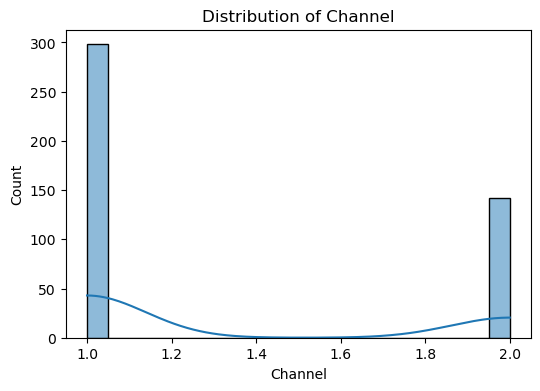

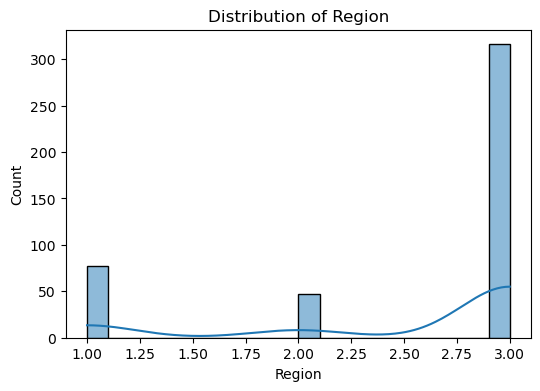

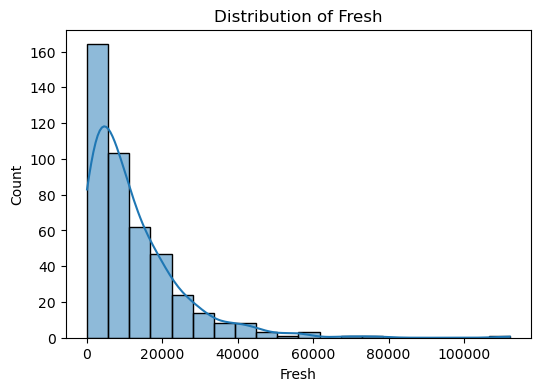

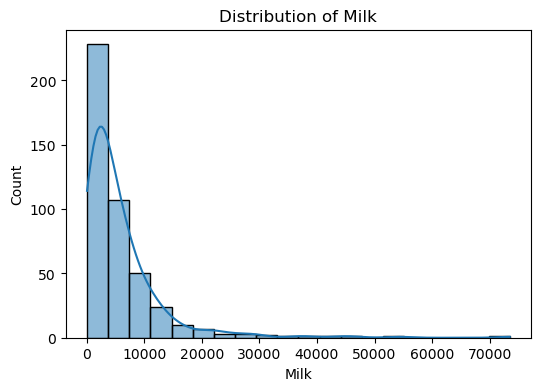

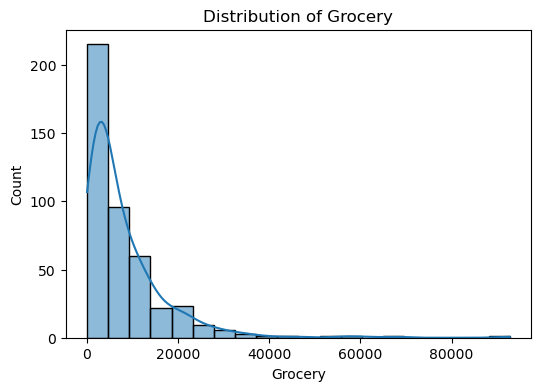

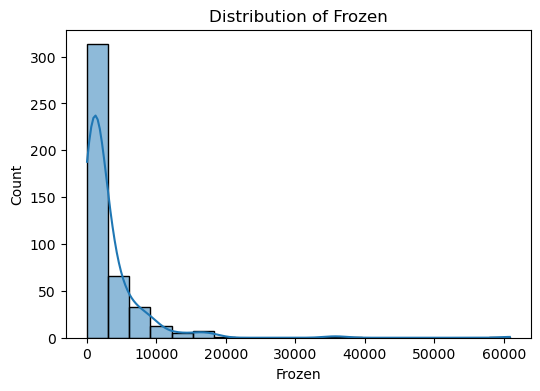

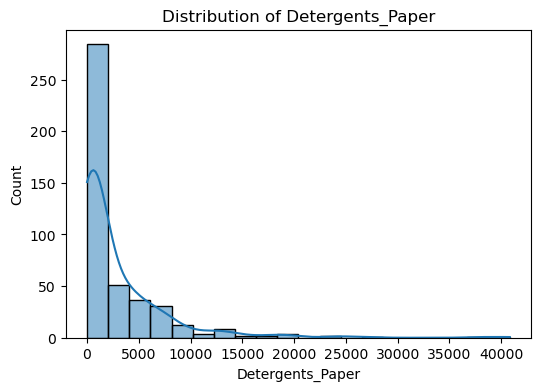

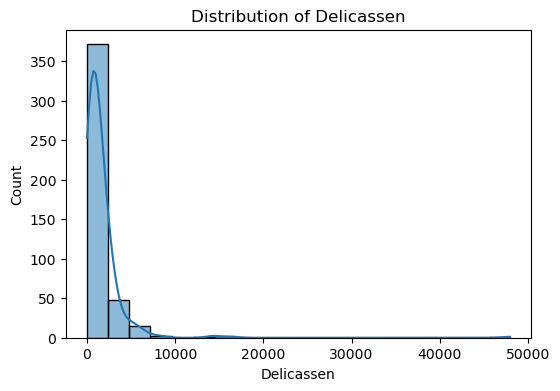

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# creating histogram for all columns

for col in data.columns:
    
  plt.figure(figsize=(6,4))
  sns.histplot(data=data[col],bins=20, kde=True)
  plt.title(f'Distribution of {col}')
  plt.show()

In [8]:
# Describing data statistically 
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### As seen from the plots a lot of data is skewed and there also could be potential outliers as for some features data points takes a big jump after 3rd quartile(75%)

In [9]:
data.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


<Axes: >

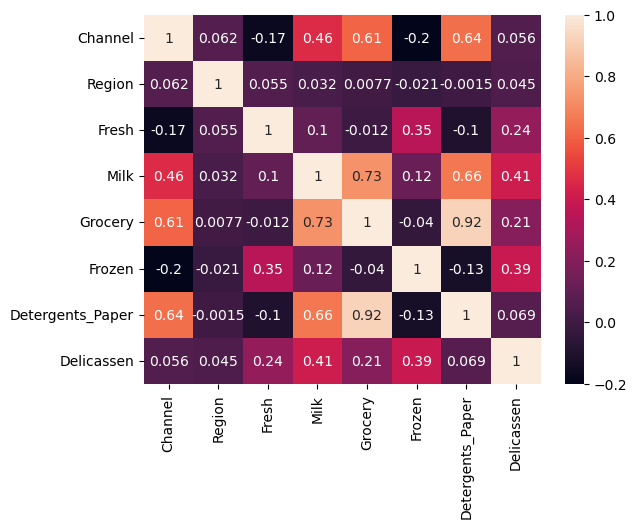

In [10]:
# checking correlation matrix between all columns
import seaborn as sns

correlation_matrix = data.corr()

# creating heatmap for correlation matrix
sns.heatmap(correlation_matrix, annot=True)

### Identifying outliers

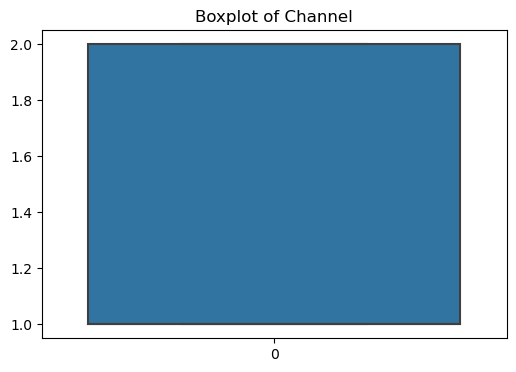

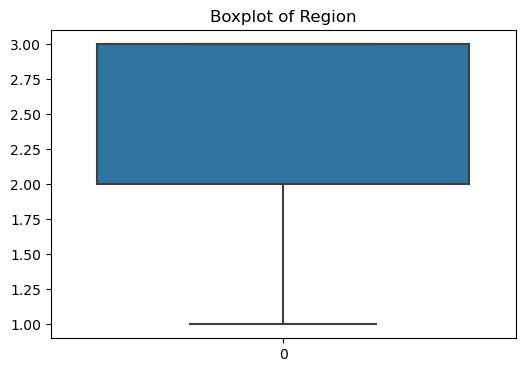

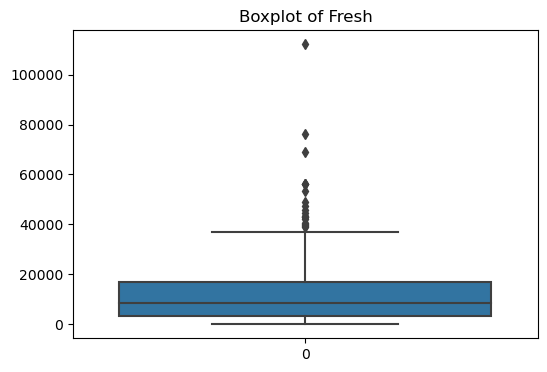

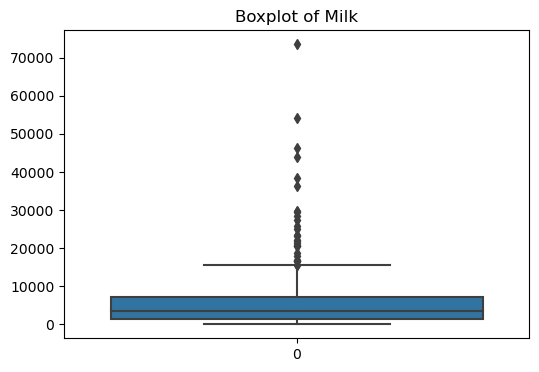

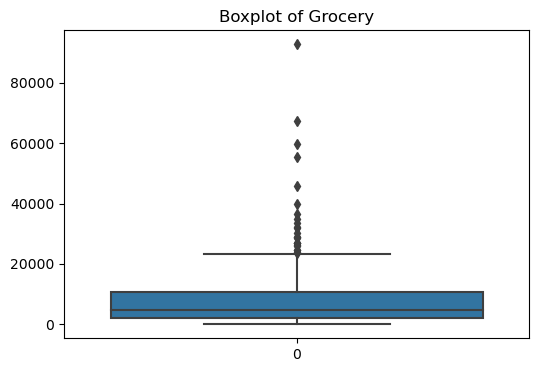

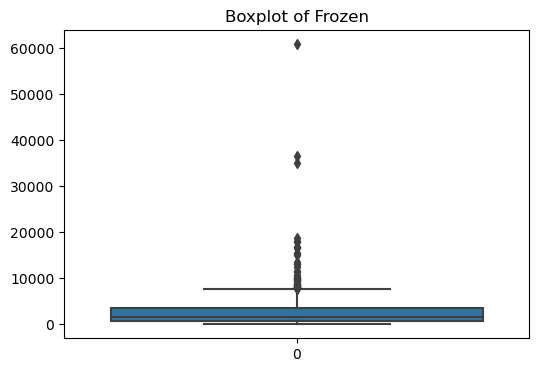

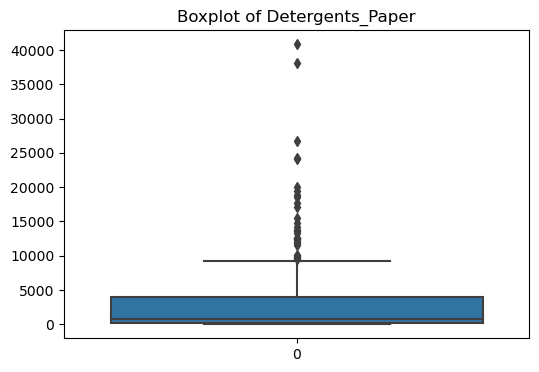

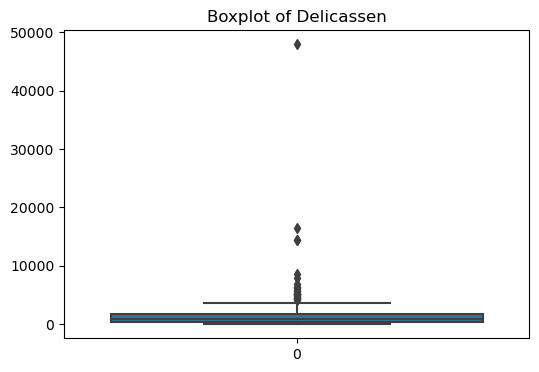

In [11]:
# draw boxplot for all columns
for col in data.columns:
    
  plt.figure(figsize=(6,4))
  sns.boxplot(data=data[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

### There are outliers present in the data  as per boxplot

In [12]:
def check_outliers(dataframe):
    all_outliers = []  # Initialize an empty list to store outliers

    for column in dataframe.columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        
        column_outliers = dataframe[(dataframe[column] < (Q1 - 1.5*IQR)) | (dataframe[column] > (Q3 + 1.5*IQR))]
        
        # Append the outliers for the current column to the list
        all_outliers.append(column_outliers)
        
    return all_outliers

In [13]:
outliers = check_outliers(data)

### Handeling Outliers by replacing the outliers more than upper limit with the upper limit and less than lower limit with the lower limit

In [14]:
def handle_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    dataframe[column] = dataframe[column].apply(lambda x: upper_limit if x > upper_limit else lower_limit if x < lower_limit else x)


In [15]:
# Handle outliers for each feature
for column in data.columns:
    handle_outliers(data, column)

In [16]:
# checking outliers after handeling itb
check_outliers(data)

[Empty DataFrame
 Columns: [Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen]
 Index: [],
 Empty DataFrame
 Columns: [Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen]
 Index: [],
 Empty DataFrame
 Columns: [Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen]
 Index: [],
 Empty DataFrame
 Columns: [Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen]
 Index: [],
 Empty DataFrame
 Columns: [Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen]
 Index: [],
 Empty DataFrame
 Columns: [Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen]
 Index: [],
 Empty DataFrame
 Columns: [Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen]
 Index: [],
 Empty DataFrame
 Columns: [Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen]
 Index: []]

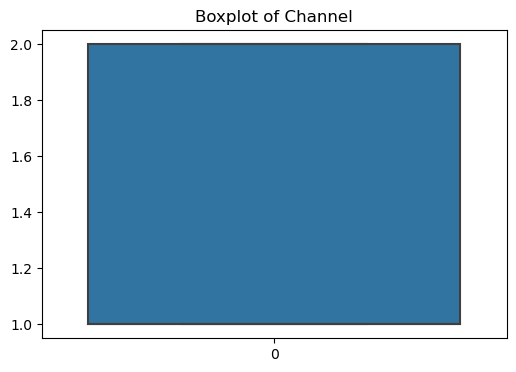

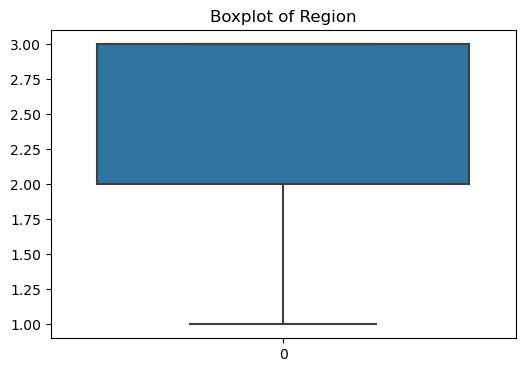

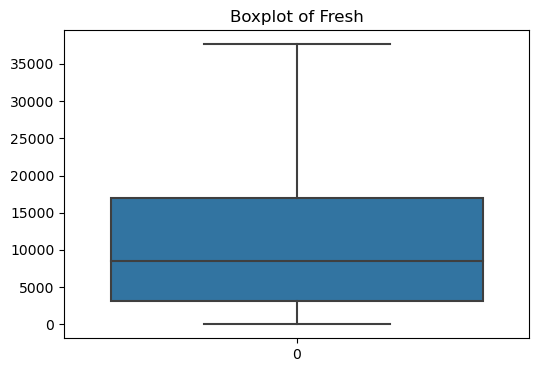

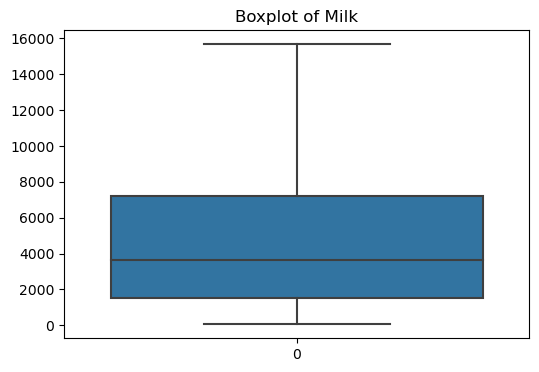

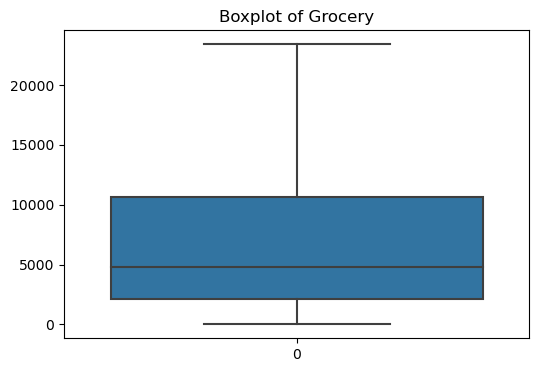

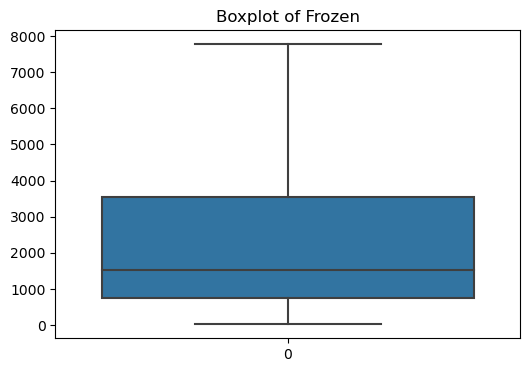

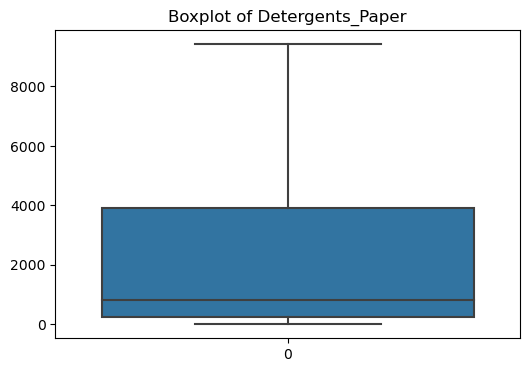

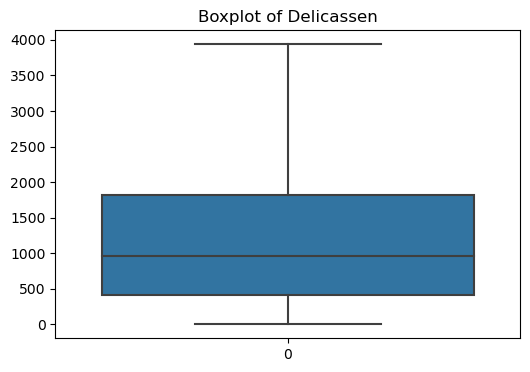

In [17]:
# draw boxplot for all columns
for col in data.columns:
    
  plt.figure(figsize=(6,4))
  sns.boxplot(data=data[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

### Outliers has been adjusted

<Axes: >

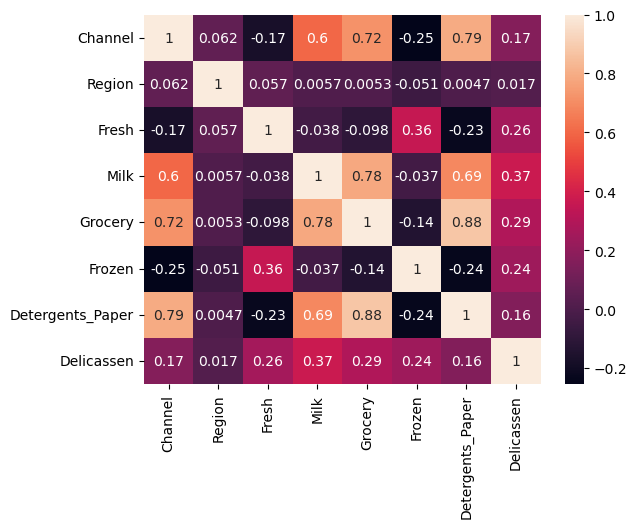

In [18]:
# checking correlation matrix between all columns after adjusting outliers
import seaborn as sns

correlation_matrix = data.corr()

# creating heatmap for correlation matrix
sns.heatmap(correlation_matrix, annot=True)

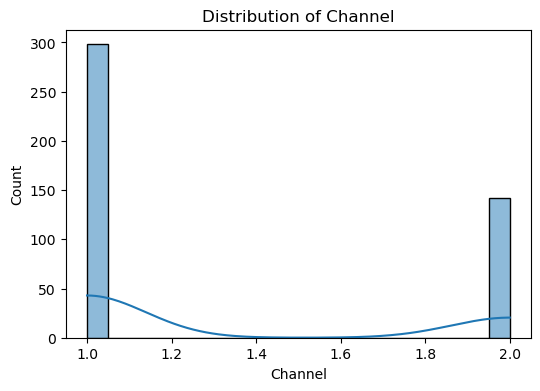

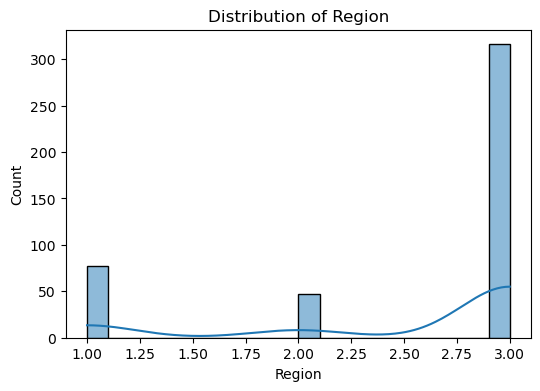

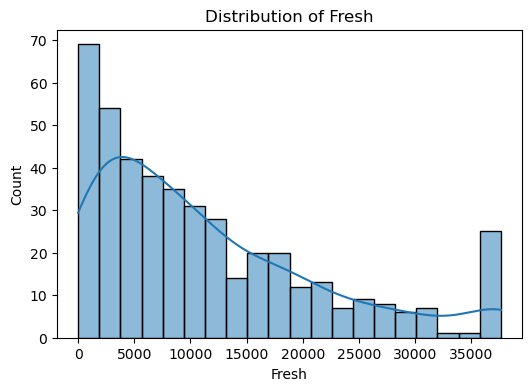

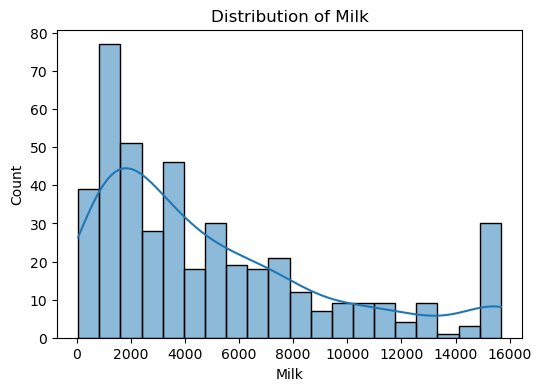

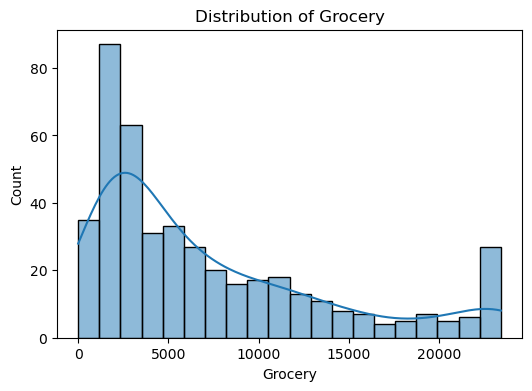

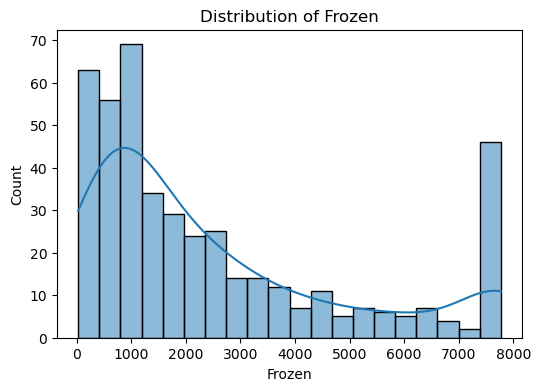

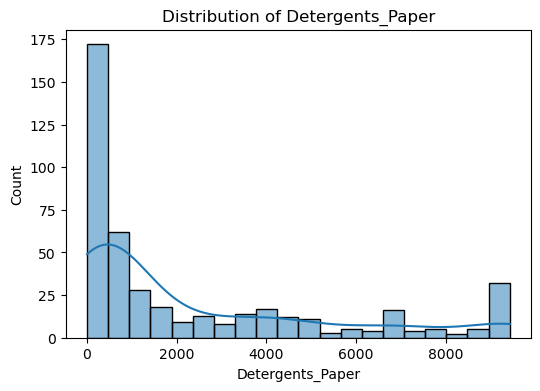

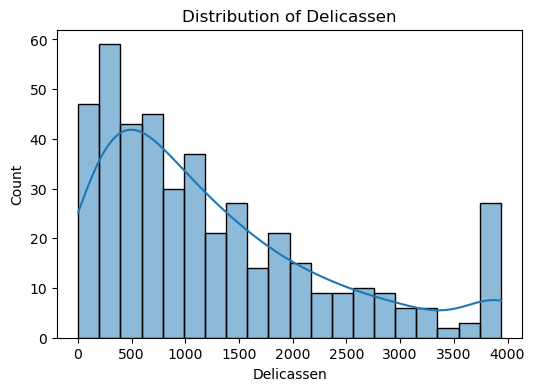

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# creating histogram for all columns

for col in data.columns:
    
  plt.figure(figsize=(6,4))
  sns.histplot(data=data[col],bins=20, kde=True)
  plt.title(f'Distribution of {col}')
  plt.show()

### Distribution is much normal after adjusting outliers for the data

#### Most of the clustering algorithms are sensitive to scale of the data so scaling the data

In [20]:
from sklearn.preprocessing import StandardScaler

# create a standardscalar object
scaler = StandardScaler()

data_scaled = scaler.fit_transform(data)

------------

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [21]:
# Trying to find the optimal k by elbow method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# empty list to append the errors for eack interation 
scores = []

cluster = range(1,15) #range of K values to try

for k in cluster:
   kmeans = KMeans(n_clusters=k, random_state=42)
   kmeans.fit(data_scaled)
   scores.append(kmeans.inertia_)

C:\Users\pruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\pruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

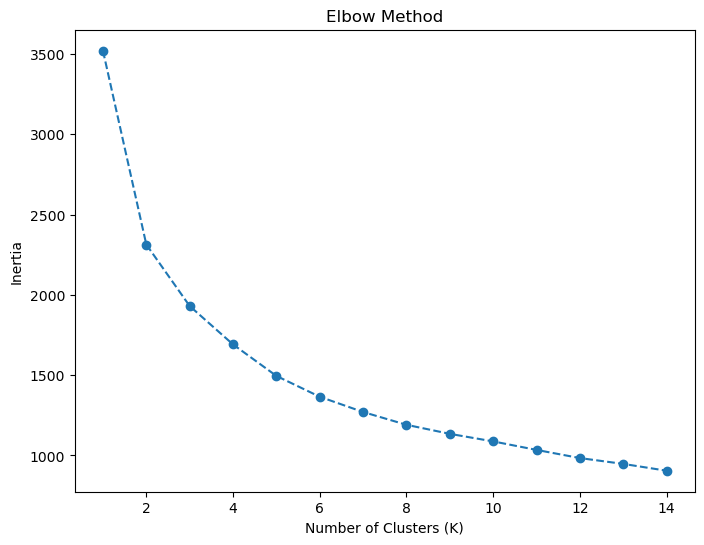

In [22]:
# plot the elbow method
plt.figure(figsize=(8,6))
plt.plot(cluster, scores, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel("Number of Clusters (K)")
plt.ylabel('Inertia')
plt.show()

#### As seen on the graph the change is steady after 4, so we will keep 4 clusters

In [23]:
# create the k-means clustering with 4 clusters we got from Elbow method
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

C:\Users\pruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [24]:
# retreive cluster label
cluster_labels = kmeans.labels_

In [25]:
# adding the cluster to the dataframe
data['Cluster'] = cluster_labels

In [26]:
# checking the cluster size
data['Cluster'].value_counts()

2    155
0    129
1     84
3     72
Name: Cluster, dtype: int64

In [27]:
# Check the characteristics of each cluster
for i in range(4):
    print("\nCluster ", i)
    print(data[data['Cluster'] == i].describe())


Cluster  0
          Channel      Region         Fresh          Milk       Grocery  \
count  129.000000  129.000000    129.000000    129.000000    129.000000   
mean     1.968992    2.635659   7826.478682   9494.864341  15144.325581   
std      0.174014    0.683945   7992.349476   3927.588538   5721.674972   
min      1.000000    1.000000     18.000000   1275.000000   5126.000000   
25%      2.000000    3.000000   1725.000000   6337.000000  10487.000000   
50%      2.000000    3.000000   5224.000000   8808.000000  13792.000000   
75%      2.000000    3.000000  11519.000000  12697.000000  21203.000000   
max      2.000000    3.000000  37642.750000  15676.125000  23409.875000   

            Frozen  Detergents_Paper   Delicassen  Cluster  
count   129.000000        129.000000   129.000000    129.0  
mean   1458.203488       6270.133721  1560.486434      0.0  
std    1398.022419       2430.384358  1146.999500      0.0  
min      25.000000        836.000000     3.000000      0.0  
25%    

In [28]:
# calculating the mean values for features per clusters
cluster_means = data.groupby(by='Cluster').mean()

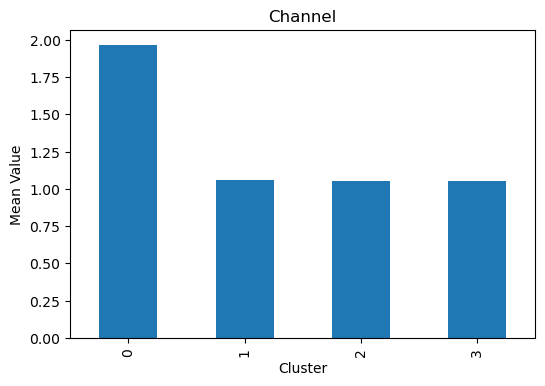

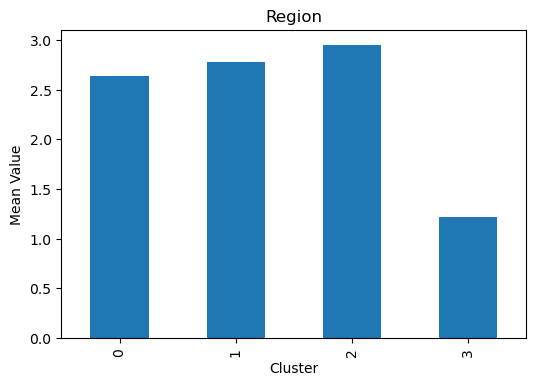

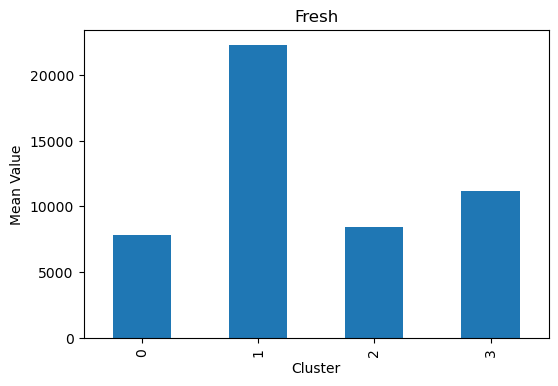

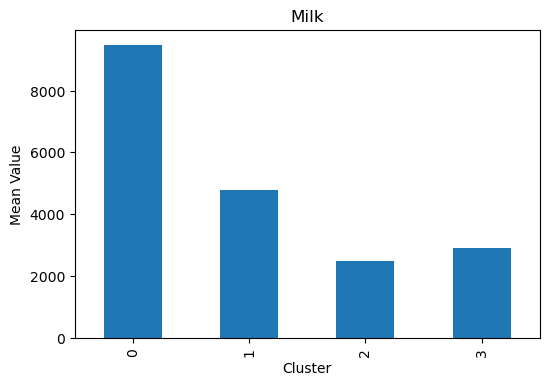

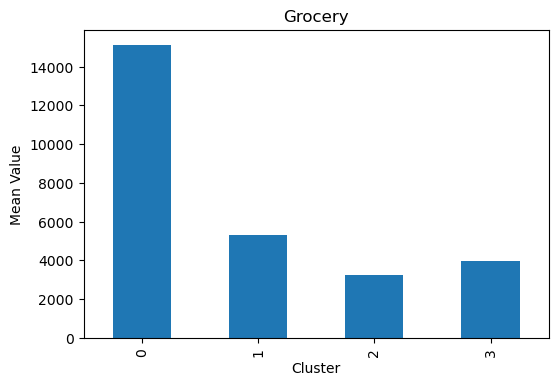

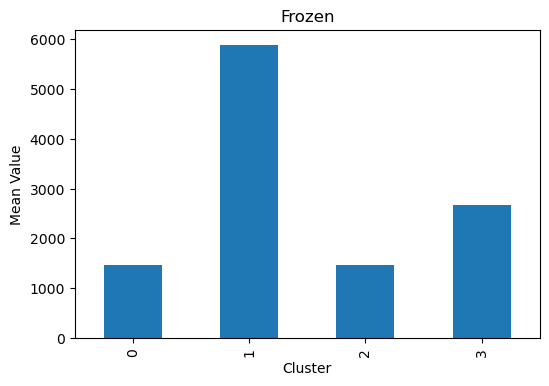

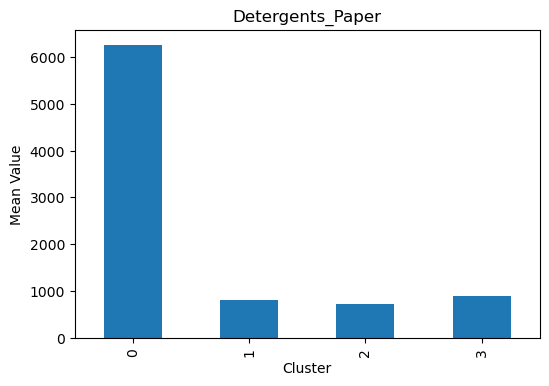

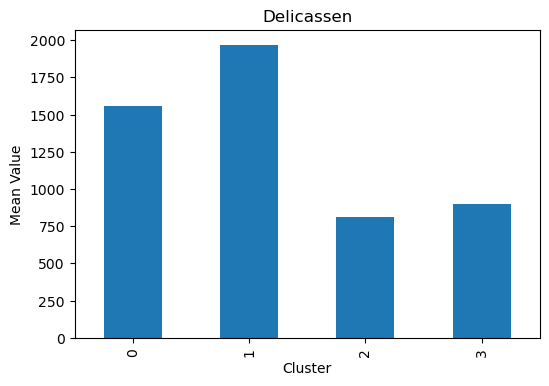

In [29]:
# Transpose the DataFrame so that the features are the rows (this will make plotting easier)
cluster_means = cluster_means.transpose()

# Create bar plot for each feature
for feature in cluster_means.index:
    cluster_means.loc[feature].plot(kind='bar', figsize=(6,4))
    plt.title(feature)
    plt.ylabel('Mean Value')
    plt.show()

## From the Charts above we can see how all the similar features are clustered together
## You can conform it with the correlation matrix

----------------

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

### Creating Dendogram to see the clusters forming together based on similarity.
### Selecting Euclidean distance for distance metric
### Selecting Ward Linkage:
                 Merge clusters to minimize the increase in the sum of squared distances within clusters 

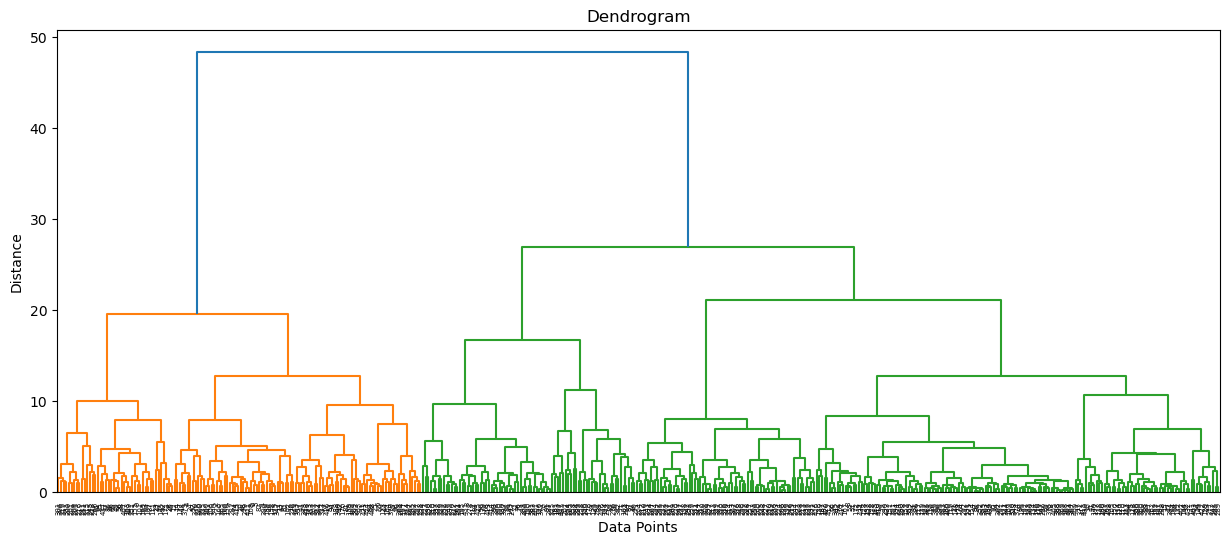

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

linkage_method = 'ward'
d = linkage(data_scaled, method=linkage_method, metric='euclidean')


# Plot the dendrogram to determine the optimal number of clusters
plt.figure(figsize=(15, 6))
dendrogram(d)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()




In [32]:
# Based on the dendrogram, selecting a cut-off point
cut_off_distance = 20  
clusters = fcluster(d, t=cut_off_distance, criterion='distance')

In [33]:
# copying the original dataframe and adding the clusters observed from dendogram
data_dendo = data.copy()

In [36]:
# add the clusters to copied data 
data_dendo['Cluster'] = clusters

In [43]:
# Check the characteristics of each cluster
for i in range(1,5):
    print("\nCluster ", i)
    print(data_dendo[data_dendo['Cluster'] == i].describe())


Cluster  1
       Channel      Region         Fresh          Milk       Grocery  \
count    138.0  138.000000    138.000000    138.000000    138.000000   
mean       2.0    2.637681   8709.364130   8997.467391  14354.724638   
std        0.0    0.682867   8718.049467   4140.094880   6132.984433   
min        2.0    1.000000     18.000000   1124.000000   4523.000000   
25%        2.0    3.000000   2325.750000   6134.000000   9580.500000   
50%        2.0    3.000000   5803.500000   8156.000000  12649.500000   
75%        2.0    3.000000  12185.250000  12294.250000  20372.250000   
max        2.0    3.000000  37642.750000  15676.125000  23409.875000   

            Frozen  Detergents_Paper   Delicassen  Cluster  
count   138.000000        138.000000   138.000000    138.0  
mean   1456.791667       5900.907609  1516.862319      1.0  
std    1371.471554       2646.633967  1159.060374      0.0  
min      33.000000        523.000000     3.000000      1.0  
25%     502.000000       3875.7500

In [45]:
# calculating the mean values for features per clusters
cluster_means = data_dendo.groupby(by='Cluster').mean()

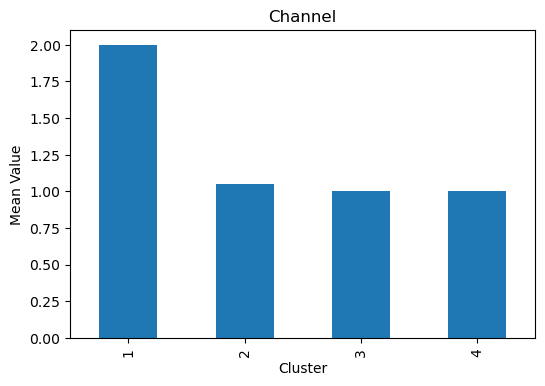

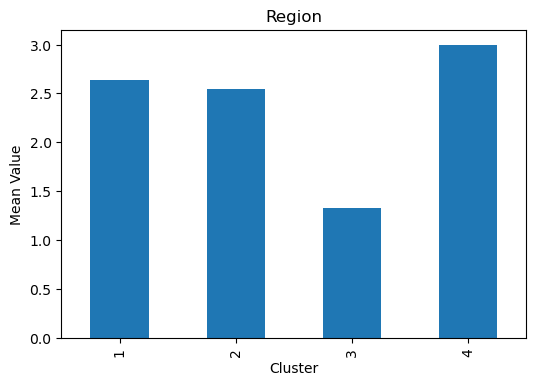

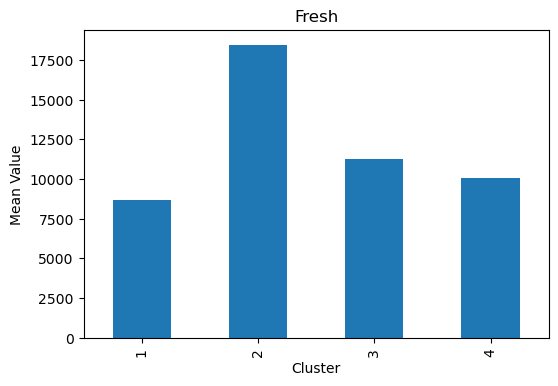

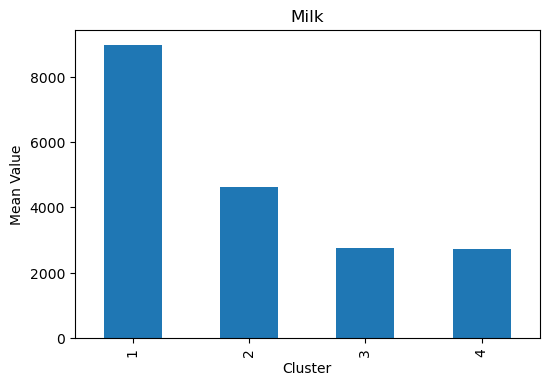

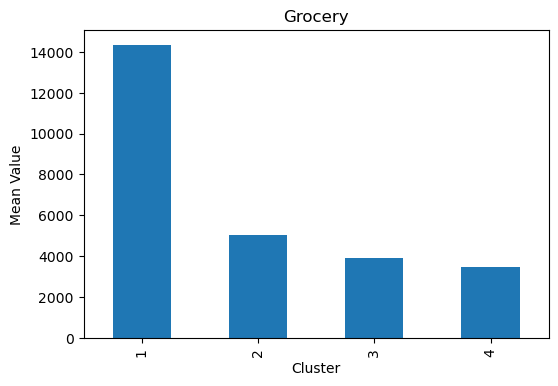

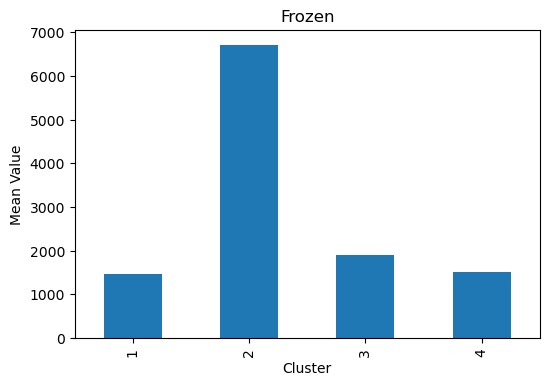

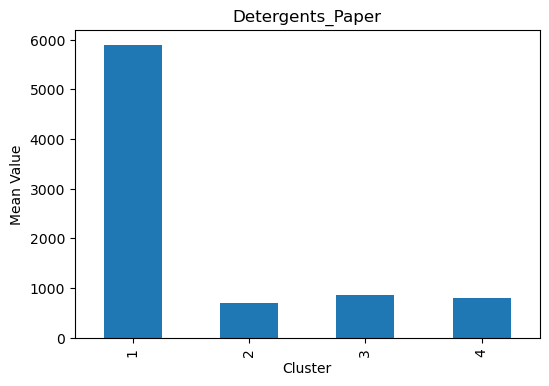

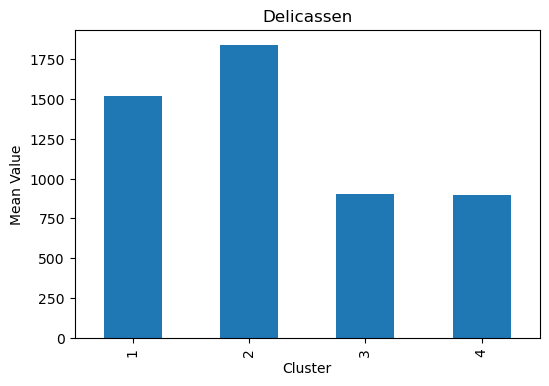

In [46]:
# Transpose the DataFrame so that the features are the rows (this will make plotting easier)
cluster_means = cluster_means.transpose()

# Create bar plot for each feature
for feature in cluster_means.index:
    cluster_means.loc[feature].plot(kind='bar', figsize=(6,4))
    plt.title(feature)
    plt.ylabel('Mean Value')
    plt.show()

## As seen in the graph the numbers are higher for features belonging to a particular cluster (i.e features are not divided along the different clusters equally)

-------------------

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

#### PCA is used for dimension reduction on the features, we will start with the model and let it decide the features and then plot the Scree Plot to check how many dimensions explains most of the variance

In [47]:
from sklearn.decomposition import PCA

n_components = None  #We will let the PCA decide the components to keep
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(data_scaled)

In [52]:
# checking the variance explained by the principal components from the PCA model
explained_variance = pca.explained_variance_ratio_

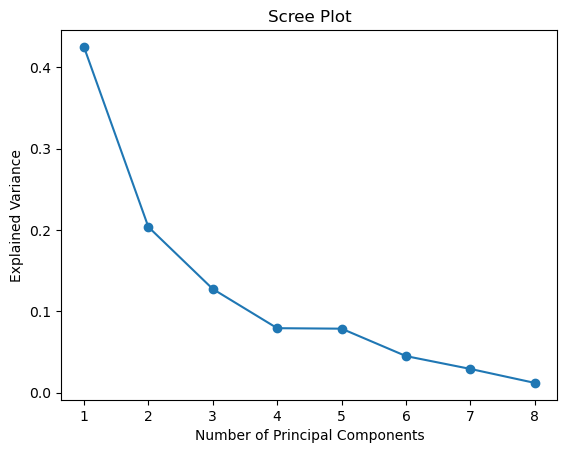

In [60]:
# creating a scree plot for explained_variance for all components and selcting the efficient number of components 
import matplotlib.pyplot as plt

plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')


plt.show()

#### We can see after 4 th component the variance starts to level off, so we can conclude that 4 principle components will explain most of the variance

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

(1) Data is not normally distributed.

(2) Clustering Algorithms are sensitive to outliers

(3) Hierchical Clustering is more effective then KMeans

(4) 4 principle components components will explain most of the variance(found through PCA)